In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# our own package
from analysis import time_of_day

In [2]:
# relative path to data & figures directory
from paths import DATA_PATH, FIGURES_PATH

In [4]:
time_data = pd.read_excel(f"{DATA_PATH}/time_2019.xlsx",
                          header=3,
                          index_col=0,
                          sheet_name=None)
time_data.keys()

dict_keys(['Table 2A', 'Table 2B', 'Table 2C', ' Table 2D', ' Table 2E', 'Parameters'])

In [5]:
fatal_crashes = time_data["Table 2B"].astype(float)
fatal_crashes = fatal_crashes.drop(index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'])
fatal_crashes.index = np.arange(24)

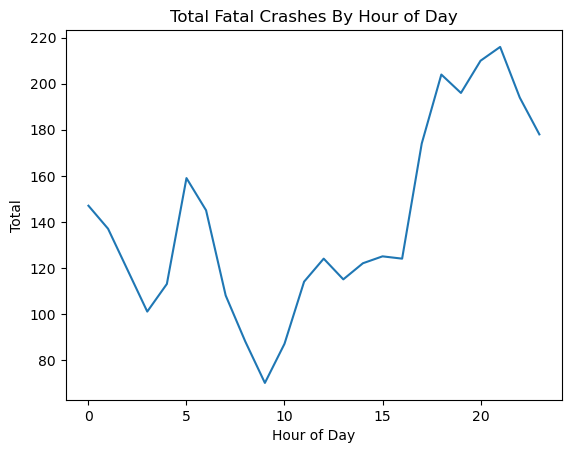

In [9]:
ax = sns.lineplot(fatal_crashes['Total'])
ax.set(xlabel='Hour of Day', ylabel='Total', title='Total Fatal Crashes By Hour of Day')
plt.savefig(f"{FIGURES_PATH}/avg_fatal_crashes_by_hour.png")
plt.show()

Looking at the graph above, we see that the peak number of fatal crashes is late at night near 9:00 PM, which could be the result of reckless driving during the night when people may have a harder time seeing. 

The lowest peak in the graph lies around 9:00 AM, which could be the result of traffic jams where people are unable to drive recklessly. 

In [10]:
injury_crashes = time_data['Table 2C'].astype(float)
injury_crashes = injury_crashes.drop(
    index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'],
    columns="Total")
injury_crashes.index = np.arange(24)
injury_crashes.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,428.0,339.0,352.0,398.0,380.0,639.0,775.0
1,366.0,260.0,266.0,292.0,303.0,680.0,789.0
2,334.0,222.0,243.0,294.0,346.0,729.0,778.0
3,236.0,196.0,202.0,234.0,250.0,443.0,529.0
4,274.0,276.0,291.0,279.0,271.0,383.0,388.0


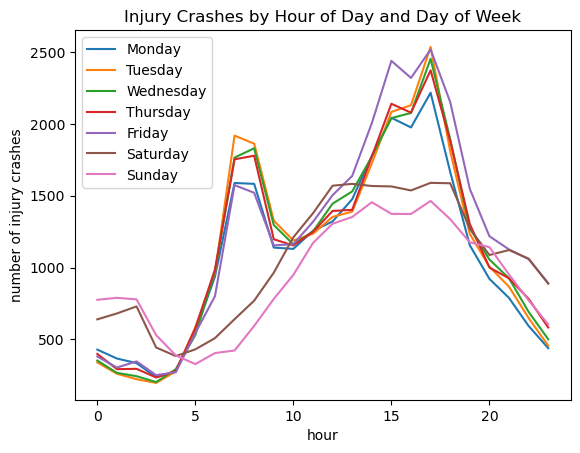

In [12]:
plt.plot(injury_crashes, label=injury_crashes.columns)
plt.xlabel("hour")
plt.ylabel("number of injury crashes")
plt.title("Injury Crashes by Hour of Day and Day of Week")
plt.legend()
plt.savefig(f"{FIGURES_PATH}/injury_crashes_by_hour_and_day_of_week.png")
plt.show()

We see that weekdays have very similar patterns, with peaks at major commute times in the morning at around 7-8 AM, and in the afternoon around 5 PM, which is also just the peak commute times due to people's 9-5 jobs. However, we notice that Mondays and Fridays seem to have lower number of injury crashes in the morning, perhaps because there is less traffic closer to the weekend. Friday also seems to have more crashes in the afternoon, which could be due to drivers' fatigue or rush to get home early for the weekend.

The weekend injury crashes pattern also seems to reflect the average person's travel patterns. It seems most people go out later and return home later on weekends, but on average there seem to be fewer crashes since there are fewer cars on the road.

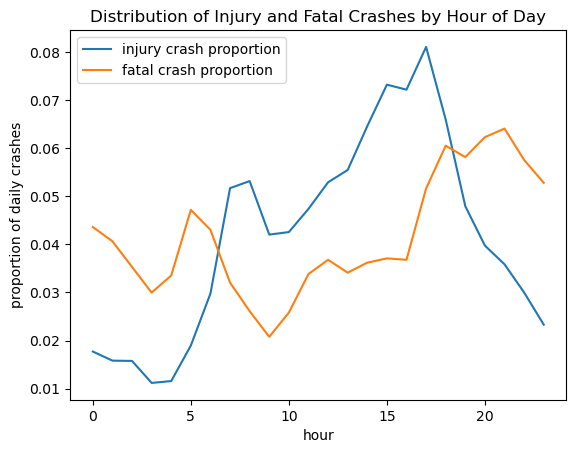

In [13]:
injury_totals = time_data['Table 2C']['Total'].astype(float)
fatal_totals = time_data["Table 2B"]['Total'].astype(float)

injury_totals = injury_totals.drop(
    index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'])
fatal_totals = fatal_totals.drop(
    index=['A.M. Total', 'P.M. Total', 'Unknown hour', 'Total'])

injury_prop = injury_totals / np.sum(injury_totals)
fatal_prop = fatal_totals / np.sum(fatal_totals)

plt.plot(np.arange(24), injury_prop, label="injury crash proportion")
plt.plot(np.arange(24), fatal_prop, label="fatal crash proportion")

plt.xlabel("hour")
plt.ylabel("proportion of daily crashes")
plt.title("Distribution of Injury and Fatal Crashes by Hour of Day")

plt.legend()
plt.savefig(f"{FIGURES_PATH}/injury_vs_fatal_hourly.png")
plt.show()

Interestingly, we see that fatal crashes and injury crashes do not have peaks at the same time. Injury crashes seem to occur around peak commute times, but fatal crashes are slightly offset from these peaks (earlier in the morning, and later in the afternoon). This is likely because heavy traffic jams and slow speeds make it more unlikely that a crash would result in a fatality.

### Comparing Daily Trends

1.2545552084147115e-33

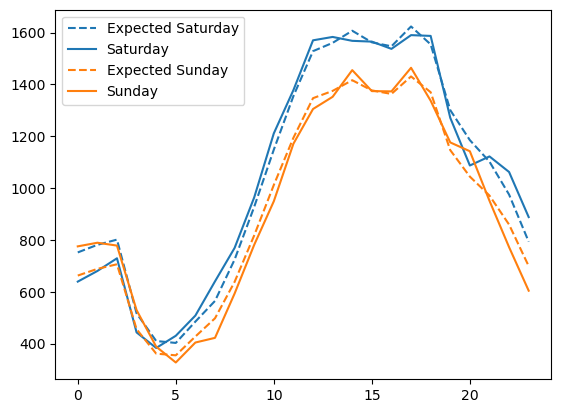

In [14]:
pval, contribs = time_of_day.chisquare(injury_crashes, ['Saturday', 'Sunday'], plot_expected=True)
plt.savefig(f"{FIGURES_PATH}/hourly_injury_saturday_vs_sunday.png")
pval

0.07740914208619751

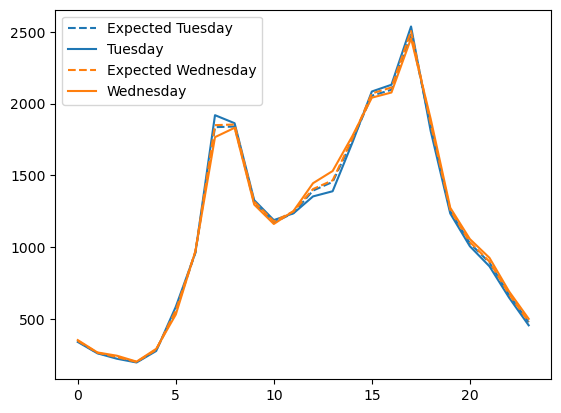

In [15]:
pval, contribs = time_of_day.chisquare(injury_crashes, ['Tuesday', 'Wednesday'], True)
plt.savefig(f"{FIGURES_PATH}/hourly_injury_tuesday_vs_wednesday.png")
pval

In [16]:
pval, contribs = time_of_day.chisquare(injury_crashes, ['Tuesday', 'Thursday'], False)
pval

7.74202088431147e-08

In [17]:
pval, contribs = time_of_day.chisquare(fatal_crashes, ['Tuesday', 'Wednesday'], False)
pval

0.28681278335892824

0.013920716971079557

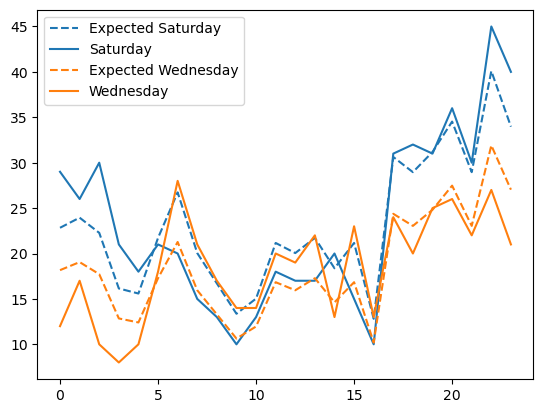

In [18]:
pval, contribs = time_of_day.chisquare(fatal_crashes, ['Saturday', 'Wednesday'], True)
plt.savefig(f"{FIGURES_PATH}/hourly_fatal_saturday_vs_wednesday.png")
pval

We used a Chi-Square test to compare crash patterns as a function of time-of-day, between different days of the week. Based on the analysis above, using a significance level of $\alpha=0.05$, we find that there is a significant difference between the pattern for injury crashes on Saturday and Sunday, but not a significant difference in the pattern between Tuesday and Wednesday. We also find significant difference between Tuesday and Thursday's patterns.

For fatal crashes, we once again find no signficant difference between Tuesday and Wednesday patterns. But we do find a difference between Saturday and Wednesday. Since there are fewer fatal crashes than injury crashes, we do seem to see slightly higher p-values.